<a href="https://colab.research.google.com/github/Divi-R0706/AI_training/blob/main/Task_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digit Recognition (using neural network)

In [26]:
import torch                     # main PyTorch library
import torch.nn as nn            # neural network modules
import torch.optim as optim      # optimization algorithms
from torch.utils.data import DataLoader  # data loader utility
from torchvision import datasets, transforms  # for MNIST dataset and transforms
import matplotlib.pyplot as plt  # for visualization

In [27]:
# Set basic hyperparameters
BATCH_SIZE = 64            # number of images per batch
LEARNING_RATE = 0.001      # how fast the model learns
NUM_EPOCHS = 5             # how many times we train on the full dataset


In [28]:
# Transform MNIST images into tensors (0–1 scale)
transform = transforms.ToTensor()   # converts PIL image → PyTorch tensor


In [29]:
# Download MNIST training dataset
train_dataset = datasets.MNIST(
    root="./data",       # folder to store data
    train=True,          # load training set
    transform=transform, # apply tensor transform
    download=True        # download if not found
)

In [30]:
# Download MNIST test dataset
test_dataset = datasets.MNIST(
    root="./data",
    train=False,         # load test set
    transform=transform,
    download=True
)

In [31]:
# Create DataLoader to automatically batch & shuffle training data
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True         # randomize order every epoch for better learning
)

In [32]:
# Create DataLoader for test data (no need to shuffle)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)


In [33]:
# Define a simple fully connected neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()

        # First dense (fully connected) layer: input 784 → 128
        self.fc1 = nn.Linear(28*28, 128)

        # Second dense layer: 128 → 10 (digit classes)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Flatten 28×28 image into 1×784 vector
        x = x.view(-1, 28*28)

        # Apply first fully connected layer + ReLU activation
        x = torch.relu(self.fc1(x))

        # Output layer (logits for 10 classes)
        x = self.fc2(x)

        return x

# Create model instance
model = SimpleNN()


In [34]:
# Use cross-entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

# Adam optimizer updates weights to reduce loss
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [35]:
#  Training + evaluation per epoch
train_losses = []
test_accuracies = []
for epoch in range(NUM_EPOCHS):
    # ---- Training ----
    model.train()
    total_loss = 0.0

    for images, labels in train_loader:
        outputs = model(images)             # forward
        loss = criterion(outputs, labels)   # loss

        optimizer.zero_grad()               # clear gradients
        loss.backward()                     # backprop
        optimizer.step()                    # update weights

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    # ---- Testing ----
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Loss: {avg_loss:.4f} | Test Accuracy: {accuracy:.2f}%")


Epoch 1/5 | Loss: 0.3443 | Test Accuracy: 94.47%
Epoch 2/5 | Loss: 0.1624 | Test Accuracy: 96.12%
Epoch 3/5 | Loss: 0.1135 | Test Accuracy: 96.71%
Epoch 4/5 | Loss: 0.0865 | Test Accuracy: 97.12%
Epoch 5/5 | Loss: 0.0680 | Test Accuracy: 97.32%


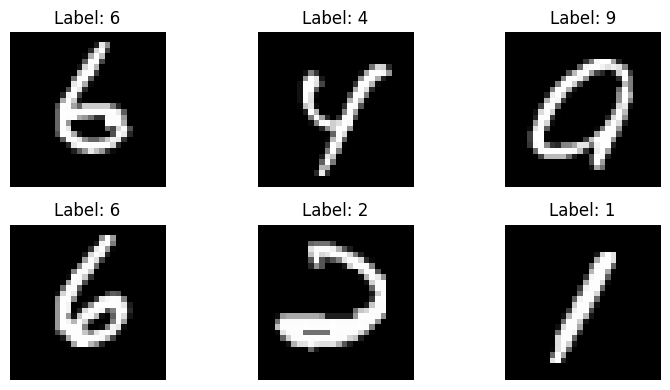

In [24]:
# Get one batch of images and labels
images, labels = next(iter(train_loader))

# Show first 6 images in the batch
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    # images[i] shape: (1, 28, 28) → remove channel dimension using squeeze(0)
    plt.imshow(images[i].squeeze(0), cmap="gray")
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()

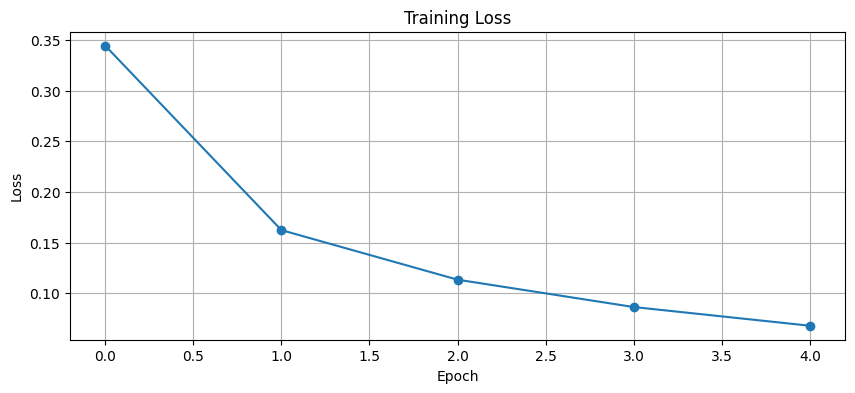

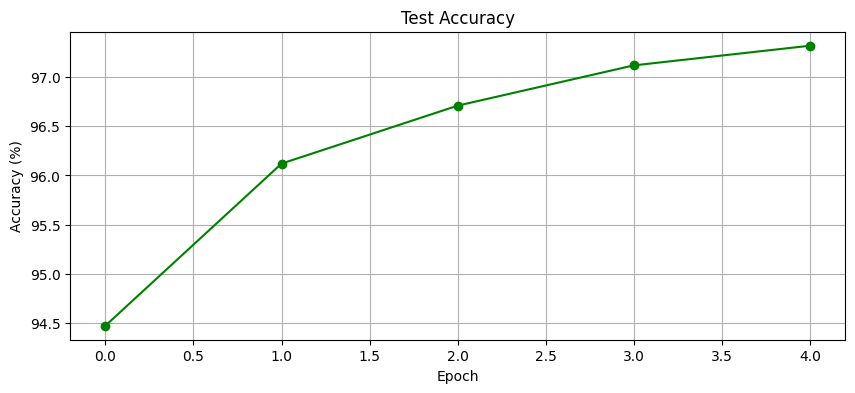

In [36]:
# Plot training loss
plt.figure(figsize=(10,4))
plt.plot(train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10,4))
plt.plot(test_accuracies, marker='o', color='green')
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()
